## Desafío 13 (Lunes Semana 7)
## Dimensionalidad y Agrupación (I)
### Gustavo Morales, G10 - 04.Nov.2019

#### Ejercicio 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno
import factor_analyzer as factor
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("bfi.csv").astype(float)

In [3]:
df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617.0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6.0,3.0,4.0,3.0,1.0,NaN,16.0
1,61618.0,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2.0,4.0,3.0,3.0,2.0,NaN,18.0
2,61620.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2.0,5.0,5.0,2.0,2.0,NaN,17.0
3,61621.0,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3.0,4.0,3.0,5.0,2.0,NaN,17.0
4,61622.0,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,NaN,17.0


#### Ejercicio 2

In [4]:
df = df.drop(columns='Unnamed: 0')

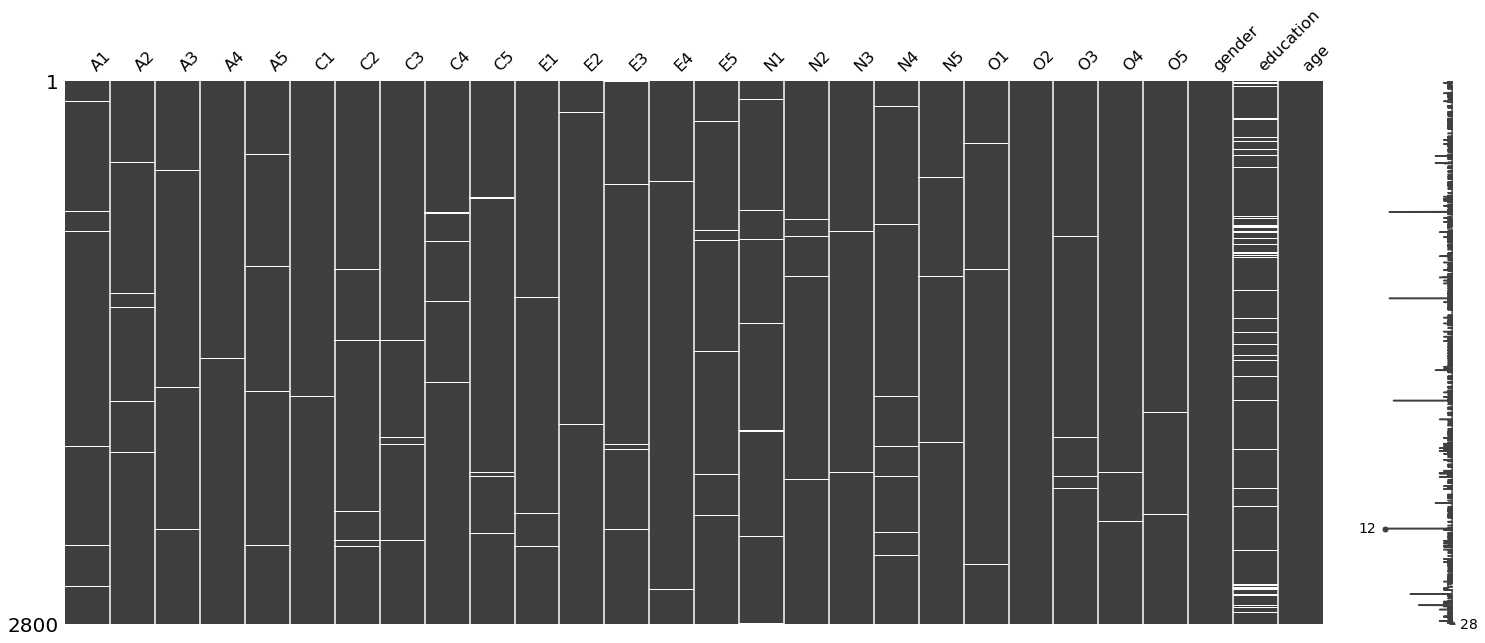

In [5]:
msno.matrix(df);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 28 columns):
A1           2784 non-null float64
A2           2773 non-null float64
A3           2774 non-null float64
A4           2781 non-null float64
A5           2784 non-null float64
C1           2779 non-null float64
C2           2776 non-null float64
C3           2780 non-null float64
C4           2774 non-null float64
C5           2784 non-null float64
E1           2777 non-null float64
E2           2784 non-null float64
E3           2775 non-null float64
E4           2791 non-null float64
E5           2779 non-null float64
N1           2778 non-null float64
N2           2779 non-null float64
N3           2789 non-null float64
N4           2764 non-null float64
N5           2771 non-null float64
O1           2778 non-null float64
O2           2800 non-null float64
O3           2772 non-null float64
O4           2786 non-null float64
O5           2780 non-null float64
gender       2800 

In [7]:
df.isna().mean().sort_values(ascending=False).round(3)*100

education    8.0
N4           1.3
N5           1.0
O3           1.0
A2           1.0
C4           0.9
A3           0.9
E3           0.9
C2           0.9
E1           0.8
O1           0.8
N1           0.8
N2           0.8
E5           0.8
C1           0.8
O5           0.7
C3           0.7
A4           0.7
A1           0.6
C5           0.6
E2           0.6
A5           0.6
O4           0.5
N3           0.4
E4           0.3
O2           0.0
gender       0.0
age          0.0
dtype: float64

**(R)** Las principales variables con mayores tasas de valores perdidos son `education`, `N4`, `N5`, `O3` y `A2`.

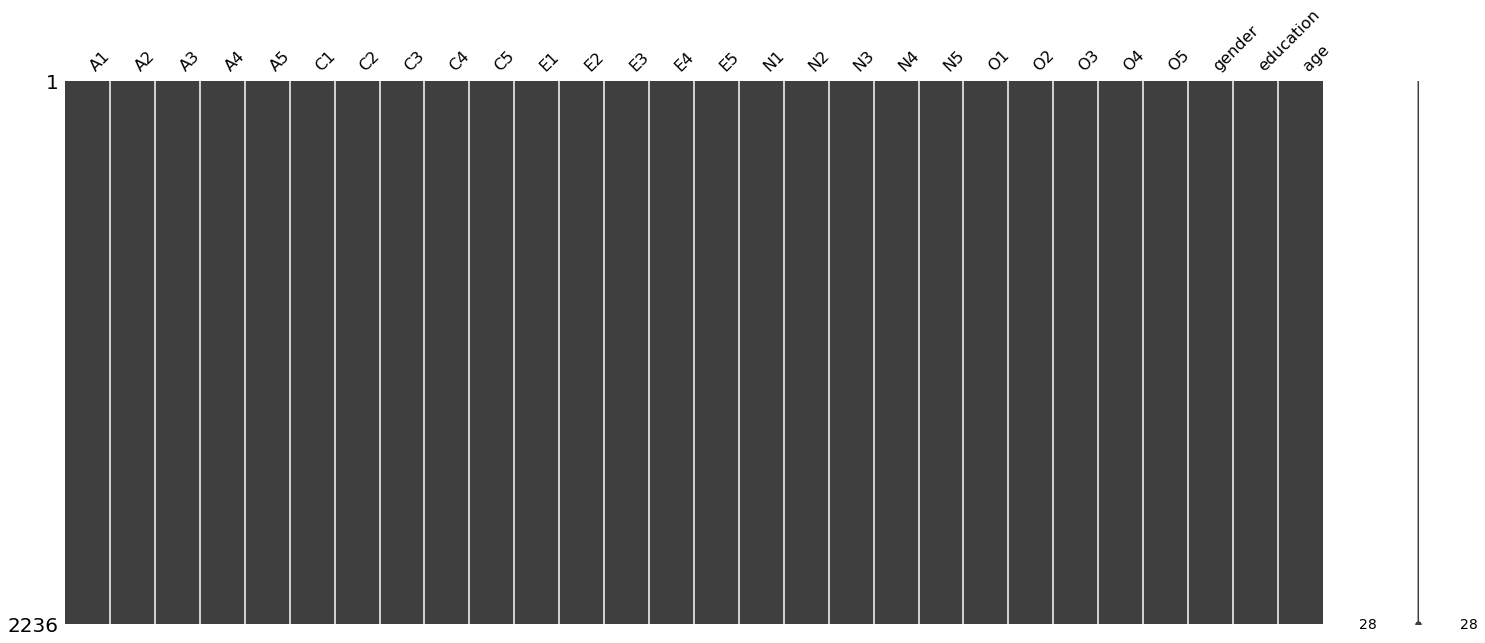

In [8]:
df = df.dropna().reset_index(drop = True)
msno.matrix(df);

#### Ejercicio 3

In [9]:
def get_subdf(dataframe, filterby):
    df_filtered = dataframe.filter(regex = filterby)
    columns, means = [], []

    for col, ser in df_filtered.iteritems():
        columns.append(col)
        means.append(ser.mean())

    return pd.DataFrame({'var': columns, 'mean': means}).sort_values(by=["mean"])

In [10]:
A = get_subdf(df, "A_*")
C = get_subdf(df, "C_*")
E = get_subdf(df, "E_*")
N = get_subdf(df, "N_*")
O = get_subdf(df, "O_*")

In [11]:
q = pd.concat([A, C, E, N, O]).sort_values(by=['mean'])
q

,var,mean
0,A1,2.365385
4,O5,2.455277
3,C4,2.500894
1,O2,2.689177
0,N1,2.908318
4,N5,2.952147
0,E1,2.969589
1,E2,3.121199
3,N4,3.175313
2,N3,3.198569


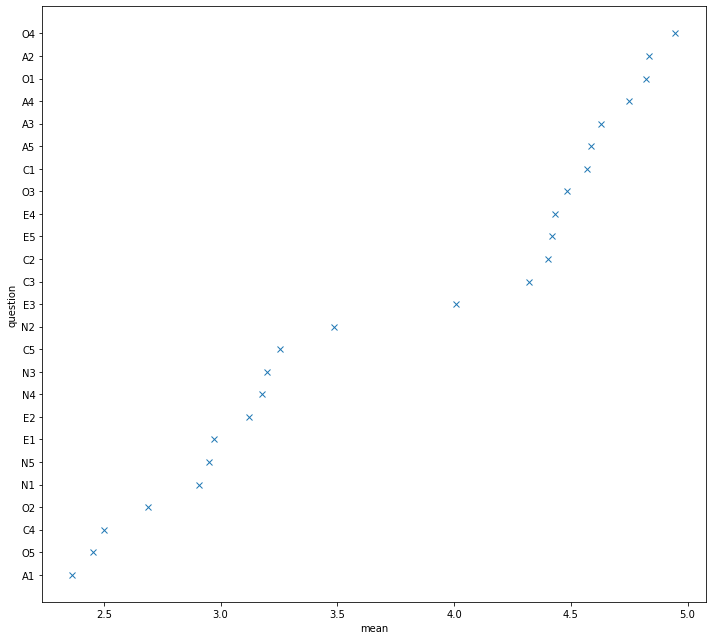

In [12]:
plt.figure(figsize = (10,9))
plt.plot(q['mean'], q['var'], 'x')
plt.xlabel('mean')
plt.ylabel('question')
plt.tight_layout()

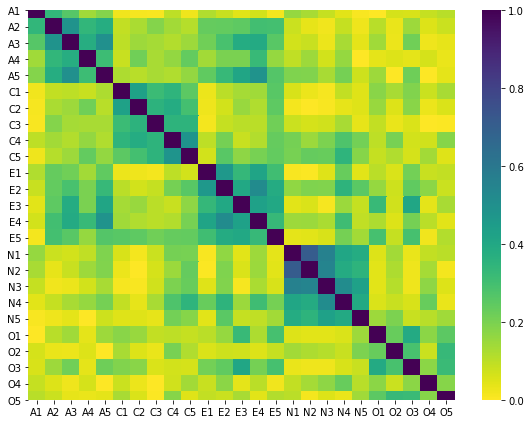

In [13]:
rcParams['figure.figsize'] = 8,6
df_q = df.loc[:, 'A1':'O5']
dfqcorr = df_q.corr()
sns.heatmap(abs(dfqcorr), annot=False, cmap='viridis_r', vmin=0, vmax=1)
plt.tight_layout()

**(R)** Por inspección visual podemos estimar que los principales patrones de correlación se encuentran en los grupos de preguntas A, C, E y N, y en menor medida el grupo A con el grupo E.

### Ejercicio 4

In [14]:
factor.calculate_bartlett_sphericity(df_q)

(16484.781654160415, 0.0)

**(R)** La prueba de esfericidad de Bartlett evalúa la aplicabilidad del análisis factorial de las variables estudiadas. El modelo es significativo (aceptamos la hipótesis nula, $H_0$) cuando se puede aplicar el análisis factorial. En este caso, como el resultado da p-value ~ $0.0$, existe evidencia sustancial para afirmar que la matriz no es la matriz identidad y por lo tanto existe covarianza entre los ítems. Así, consideramos la batería de preguntas como un dataset idóneo para aplicar análisis factorial.

In [15]:
factor.calculate_kmo(df_q)

(         KMO
 A1  0.738005
 A2  0.834387
 A3  0.871681
 A4  0.870525
 A5  0.900699
 C1  0.838225
 C2  0.788569
 C3  0.849578
 C4  0.823776
 C5  0.861994
 E1  0.841634
 E2  0.883987
 E3  0.893156
 E4  0.878282
 E5  0.894127
 N1  0.778281
 N2  0.778607
 N3  0.860167
 N4  0.886345
 N5  0.860604
 O1  0.855123
 O2  0.783962
 O3  0.833868
 O4  0.781271
 O5  0.758213, 0.8469455121781353)

El test KMO (Kaiser, Meyer y Olkin) relaciona los coeficientes de correlación observados entre las variables. Cuanto más cerca de 1 tenga el valor obtenido del test KMO, implica que la relación entres las variables es alta. En este caso, obtuvimos un puntaje de 0.84 general, con ninguno bajo 0.7. Es decir, existe al menos un factor latente y la reducción de dimensionalidad corresponde.

In [16]:
factorize = factor.FactorAnalyzer()
factorize.analyze(df_q, n_factors=10, rotation=None)

In [17]:
factor_evalues = factorize.get_eigenvalues()[0]
evalues_values = [factor_evalues.values[i][0] for i in range(len(factor_evalues.values))]
evalues_index = np.arange(1,len(factor_evalues.values)+1)

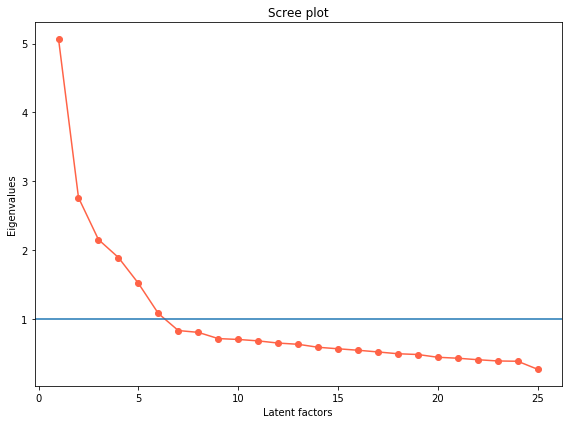

In [18]:
plt.plot(evalues_index, evalues_values, 'o-', color='tomato')
plt.xlabel('Latent factors')
plt.ylabel('Eigenvalues')
plt.axhline(1)
plt.title('Scree plot')
plt.tight_layout()

**(R)** Podemos observar que hay 6 factores latentes con valores propios mayor a 1, los cuales vamos a conservar para posterior análisis. Las cargas $\lambda$ del modelo están dadas por:

In [19]:
NFACTORS = 6
factorize = factor.FactorAnalyzer()
factorize.analyze(df_q, n_factors=NFACTORS, rotation=None)  # refactorization with retained latent factors
factorize.loadings.applymap(lambda x: np.where(x<.4, '', round(x, 2)))  # factorization loadings, filtering the most relevant ones

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,,,,,,
A2,0.46,,,,,
A3,0.52,,,,,
A4,,,,,,
A5,0.57,,,,,
C1,,,0.44,,,
C2,,,0.45,,,
C3,,,,,,
C4,,,,,,
C5,,,,,,


**(R)** El análisis factorial es una técnica estadística de reducción de datos usada para explicar las correlaciones entre las variables observadas en términos de un número menor de variables no observadas llamadas factores. De acuerdo a nuestro análisis, las preguntas en nuestro dataset `df` poseen cierto nivel de correlación con al menos 6 factores latentes independientes. De forma análoga al coeficiente r de Pearson, la carga del factor al cuadrado es la fracción de la varianza en la variable explicada por el factor.

### Ejercicio 5

Extrayendo los factores:

In [20]:
extract_factor_scores = factorize.get_scores(df_q)

Y graficando los KDE plots correspondientes:

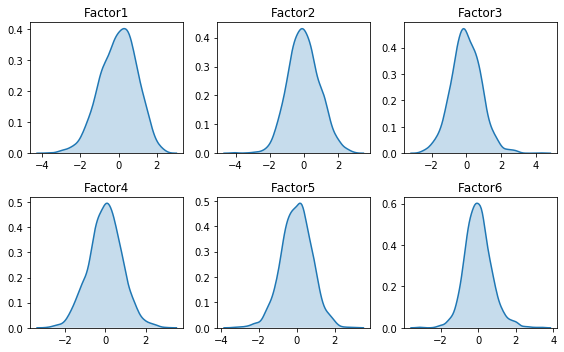

In [21]:
plt.figure(figsize = (8,5))
factors = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6']
for i, factor in enumerate(factors):
    plt.subplot(2,3,i+1)
    sns.kdeplot(extract_factor_scores[factor], shade=True)
    plt.title(factor)
    plt.legend().remove()
plt.tight_layout()

Para el modelamiento, podemos agregar estos factores a nuestra base de datos y modelar:

In [22]:
for factor in factors:
    df[factor] = extract_factor_scores[factor]
df.sample()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,O5,gender,education,age,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
1119,1.0,6.0,6.0,5.0,5.0,6.0,6.0,5.0,1.0,2.0,...,1.0,2.0,3.0,32.0,1.014582,1.163001,0.858531,0.194182,-0.017714,-1.140519


In [23]:
modelf1 = smf.ols("Factor1 ~ gender + education + age", df).fit()
modelf2 = smf.ols("Factor2 ~ gender + education + age", df).fit()
modelf3 = smf.ols("Factor3 ~ gender + education + age", df).fit()
modelf4 = smf.ols("Factor4 ~ gender + education + age", df).fit()
modelf5 = smf.ols("Factor5 ~ gender + education + age", df).fit()
modelf6 = smf.ols("Factor6 ~ gender + education + age", df).fit()

Revisando los resultados, tenemos que:

In [24]:
modelf1.summary2().tables[1]['P>|t|']

Intercept    3.570211e-11
gender       1.750930e-05
education    4.550822e-01
age          1.943944e-08
Name: P>|t|, dtype: float64

In [25]:
modelf2.summary2().tables[1]['P>|t|']

Intercept    2.347771e-05
gender       3.215033e-15
education    7.765832e-01
age          7.394470e-03
Name: P>|t|, dtype: float64

In [26]:
modelf3.summary2().tables[1]['P>|t|']

Intercept    2.006587e-01
gender       7.602266e-07
education    8.825045e-03
age          2.326685e-01
Name: P>|t|, dtype: float64

In [27]:
modelf4.summary2().tables[1]['P>|t|']

Intercept    1.257259e-04
gender       4.735221e-18
education    1.469773e-05
age          6.730695e-01
Name: P>|t|, dtype: float64

In [28]:
modelf5.summary2().tables[1]['P>|t|']

Intercept    9.994864e-09
gender       6.618817e-04
education    2.516626e-03
age          5.227519e-03
Name: P>|t|, dtype: float64

In [29]:
modelf6.summary2().tables[1]['P>|t|']

Intercept    1.513833e-17
gender       1.734915e-14
education    4.331566e-01
age          1.850583e-06
Name: P>|t|, dtype: float64

**(R)** Con una significancia de p-value$=0.05$, podemos decir que:

para el factor 1, los principales determinantes son `gender` y `age`;\
para el factor 2, los principales determinantes son `gender` y `age`;\
para el factor 3, los principales determinantes son `gender` y `education`;\
para el factor 4, los principales determinantes son `gender` y `education`;\
para el factor 5, los principales determinantes son `gender`, `age` y `education`;\
para el factor 6, los principales determinantes son `gender` y `age`.